# the dinner guest seating planner

In [1]:
import pandas as pd
guests = pd.read_csv("guests.csv", index_col=0)

In [2]:
guests.head()
#guests.tail()
#guests.info()
# guests(0).value_counts()o


,ids,game_of_thrones,tacos,grape_cotton_candy
names,,,,
Mary,230,0,4,7
Patricia,300,5,2,0
Linda,225,5,1,3
Barbara,435,9,1,8
Elizabeth,185,9,1,8


In [3]:
import numpy as np
guests_mat = guests.index.values.reshape((10, 10))
initial_population = []

In [4]:
for x in range(10):
    guests_mat = np.random.permutation(guests_mat)
    initial_population.append(guests_mat)

In [5]:
initial_population

[array([['Katherine', 'Joan', 'Ashley', 'Judith', 'Rose', 'Janice',
         'Kelly', 'Nicole', 'Judy', 'Christina'],
        ['Alice', 'Julie', 'Heather', 'Teresa', 'Doris', 'Gloria',
         'Evelyn', 'Jean', 'Cheryl', 'Mildred'],
        ['Lois', 'Tina', 'Phyllis', 'Norma', 'Paula', 'Diana', 'Annie',
         'Lillian', 'Emily', 'Robin'],
        ['Kathy', 'Theresa', 'Beverly', 'Denise', 'Tammy', 'Irene',
         'Jane', 'Lori', 'Rachel', 'Marilyn'],
        ['Lisa', 'Nancy', 'Karen', 'Betty', 'Helen', 'Sandra', 'Donna',
         'Carol', 'Ruth', 'Sharon'],
        ['Mary', 'Patricia', 'Linda', 'Barbara', 'Elizabeth', 'Jennifer',
         'Maria', 'Susan', 'Margaret', 'Dorothy'],
        ['Andrea', 'Kathryn', 'Louise', 'Sara', 'Anne', 'Jacqueline',
         'Wanda', 'Bonnie', 'Julia', 'Ruby'],
        ['Michelle', 'Laura', 'Sarah', 'Kimberly', 'Deborah', 'Jessica',
         'Shirley', 'Cynthia', 'Angela', 'Melissa'],
        ['Brenda', 'Amy', 'Anna', 'Rebecca', 'Virginia', 'Kathle

In [6]:
from scipy.spatial.distance import pdist

def calculate_interest_distance(person, *others):
    people = [guests.ix[person, 1:3]]
    for other in others:
        if other:
            people.append(guests.ix[other, 1:3])

    return np.average(pdist(people, 'cityblock')) if len(people) > 1 else 0

In [7]:
def get_element_safe(sequence, position):
    try:
        return sequence.item(position)
    except IndexError:
        return None

def calculate_chromosome_fitness(chromosome):
    fitnesses = []
    for index, gene in np.ndenumerate(chromosome):
        next_to = calculate_interest_distance(gene,
                                             get_element_safe(chromosome, (index[0], index[1] - 1)),
                                             get_element_safe(chromosome, (index[0], index[1] + 1)))
        in_front = calculate_interest_distance(gene,
                                              get_element_safe(chromosome, (index[0] - 1, index[1])))
        behind = calculate_interest_distance(gene,
                                            get_element_safe(chromosome, (index[0] + 1, index[1])))
        fitnesses.append(sum([next_to, in_front, behind]) / 3)
    return np.average(fitnesses)

In [24]:
guests.ix['Linda',1:3]
# .ix supports mixed label and positional indexing but this is not supported in the future

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


game_of_thrones    5
tacos              1
Name: Linda, dtype: int64

In [30]:
guests.ndim

2

In [8]:
generations = []

for chromosome in initial_population:
    generations.append({
        "generation": 0,
        "fitness": calculate_chromosome_fitness(chromosome),
        "chromosome": chromosome,
        "active": True
    })

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import s

In [9]:
generations = sorted(generations, key=lambda k: k['fitness'])

In [10]:
import random

def recombine(mother, father):
    child = np.empty_like(mother)
    for index, name in enumerate(guests.index):
        if index < 50:
            position = np.where(mother == name)
        else:
            position = np.where(father == name)

        if child[position]:
            filtered = np.where(np.equal(child, None))
            position = random.choice(list(zip(filtered[0], filtered[1])))

        child[position] = name

    return child

In [11]:

def mutate_chromosome(chromosome):
    first = (random.randrange(0, 10, 1), random.randrange(0, 10, 1))
    second = (random.randrange(0, 10, 1), random.randrange(0, 10, 1))

    chromosome[first[0], first[1]], chromosome[second[0], second[1]] = chromosome[second[0], second[1]], chromosome[first[0], first[1]]
    return chromosome

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def get_id(name):
    return guests.loc[name]['ids']

def draw_population(population, generation):
    get_ids = np.vectorize(get_id)
    figure, axes = plt.subplots(1, 10, figsize=(20, 3))

    for index, chromosome in enumerate(population):
        get_ids = np.vectorize(get_id)
        ids = get_ids(chromosome)
        axes[index].imshow(ids, interpolation="nearest", cmap=plt.cm.plasma)
        subplot_title = "Chromosome " + str(index)
        axes[index].set_title(subplot_title)

    plot_title = "Generation " + str(generation)
    figure.suptitle(plot_title)
    plt.show()

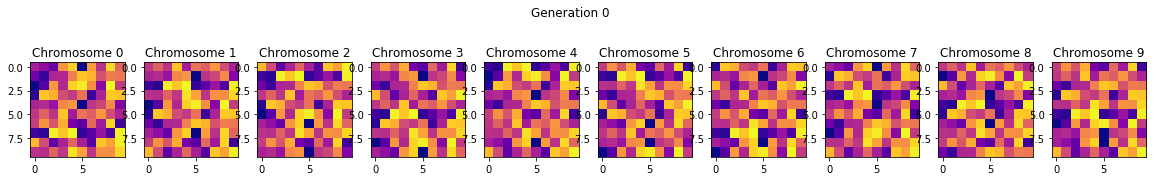

In [13]:
draw_population(initial_population, 0)

In [14]:
import copy

most_fit = []
max_fitness = None
fittest_chromosome = None

In [15]:
def get_chromosomes_in_generation(generations, generation_num):
    # Get only the chromosomes in this generation
    generation = list(filter(lambda k: k['generation'] == generation_num, 
                             generations))
    return sorted(generation, key=lambda k: k['fitness'])

In [16]:
#get_chromosomes_in_generation(generations, 0)
get_chromosomes_in_generation(generations, 500)

[]

In [17]:
def sort_chromosomes(generation, most_fit):
    """
    Sort the chromosones in ascending order by fitness
    and update the most_fit list and the fittest_chromosome.
    """
    max_fitness = generation[0]['fitness']
    most_fit.append(max_fitness)
    fittest_chromosome = generation[0]['chromosome']
    return most_fit, fittest_chromosome

In [18]:
def copy_chromosomes(generation, generations):
    """
    Copy the surviving chromosomes in generation to a
    new generation and append this new generation to
    our generations list.
    """
    new_generation = copy.deepcopy(generation)

    new_generation[-1]['active'] = False
    new_generation[-2]['active'] = False

    active = list(filter(lambda k: k['active'] == True, new_generation))
    for chromosome in active:
        chromosome['generation'] += 1

    generations.extend(active)
    return generations

In [19]:
def mate_chromosomes(generation, generations, generation_num):
    """
    Mate the two most fit chromosomes and add their
    children to the generation.
    """
    child = recombine(generation[0]['chromosome'], generation[1]['chromosome'])
    child = mutate_chromosome(child)
    generations.append({
      "active": True,
      "chromosome": child,
      "generation": generation_num + 1,
      "fitness": calculate_chromosome_fitness(child)
    })
    # Do this again for the second two most fit
    other = recombine(generation[2]['chromosome'], generation[3]['chromosome'])
    other = mutate_chromosome(chromosome)
    generations.append({
      "active": True,
      "chromosome": other,
      "generation": generation_num + 1,
      "fitness": calculate_chromosome_fitness(other)
    })
    return generations

In [20]:
def run_ga(input_generations):
    fittest = []
    max_fitness = None
    fittest_chromo = None
    for generation_num in range(30):
        if max_fitness and max_fitness < 5:
            break

        generation = get_chromosomes_in_generation(input_generations, generation_num)
        fittest, fittest_chromo = sort_chromosomes(generation, most_fit)

        input_generations = copy_chromosomes(generation, input_generations)
        input_generations = mate_chromosomes(generation, input_generations, generation_num)

        # Draw the generation that we just traversed through
        draw_population(map(lambda d: d['chromosome'], 
                        get_chromosomes_in_generation(input_generations, generation_num)), generation_num)

    return fittest, fittest_chromo

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import s

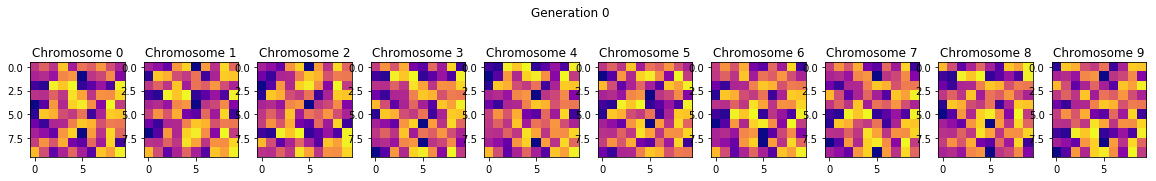

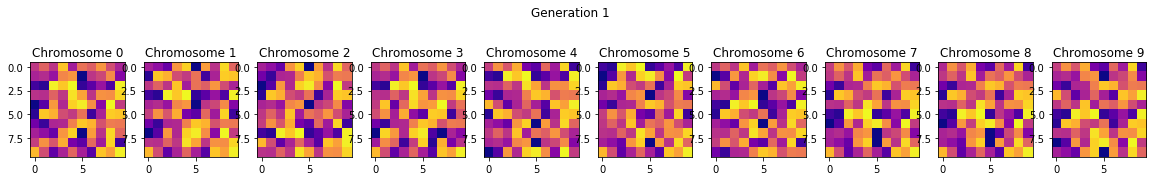

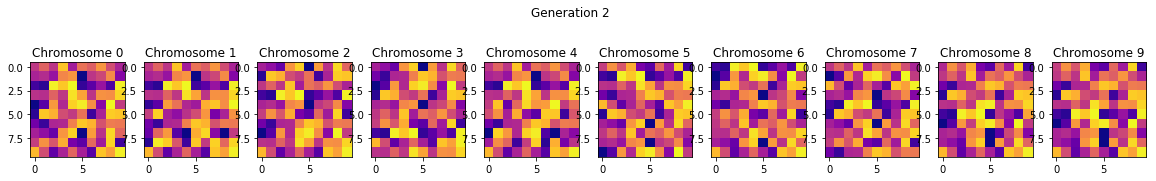

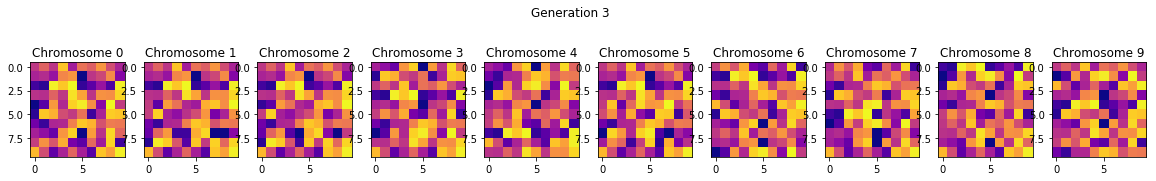

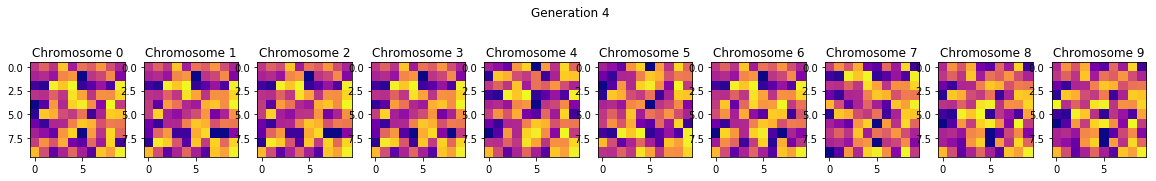

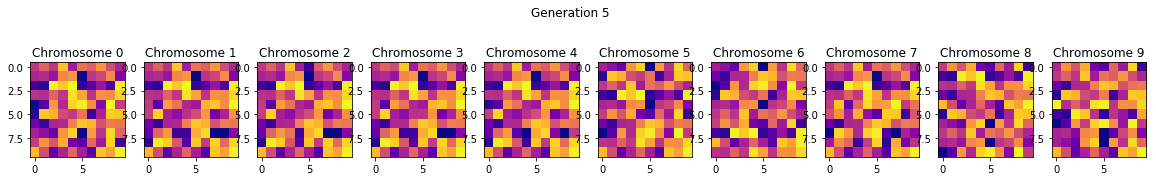

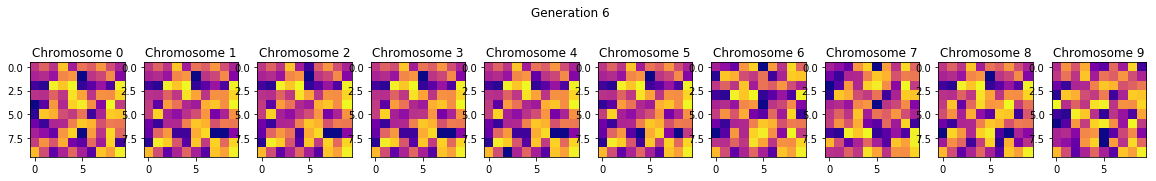

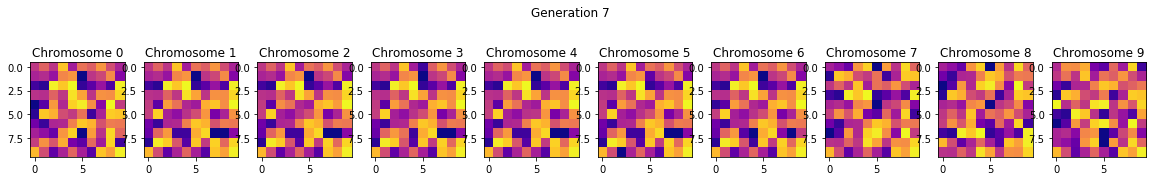

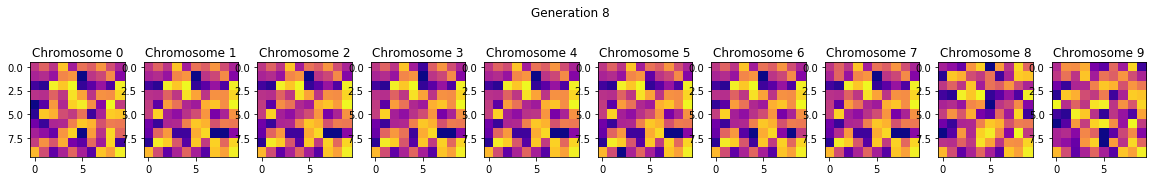

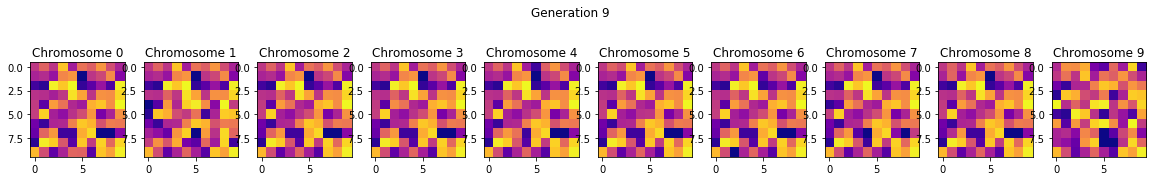

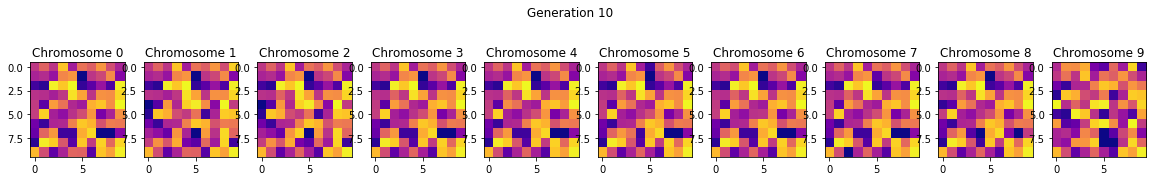

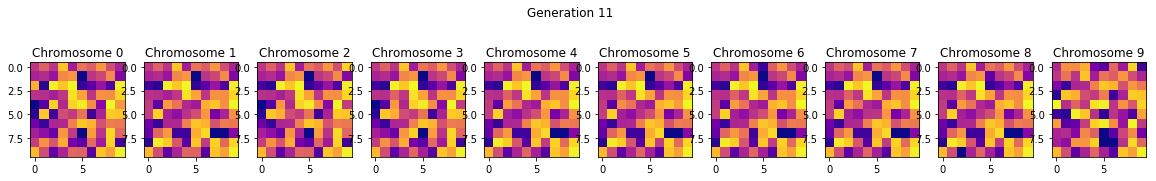

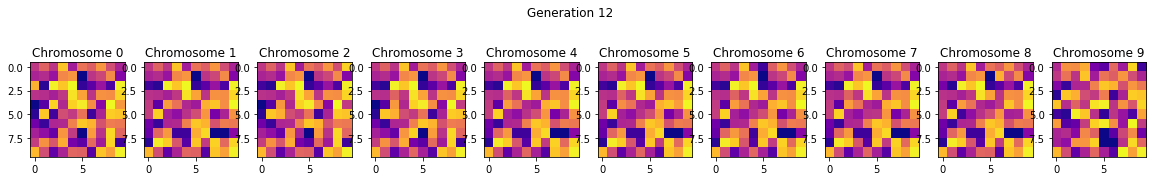

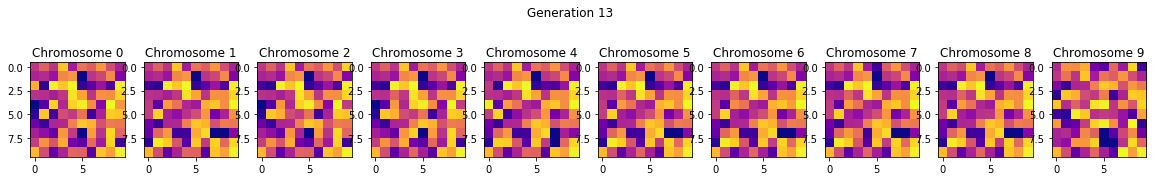

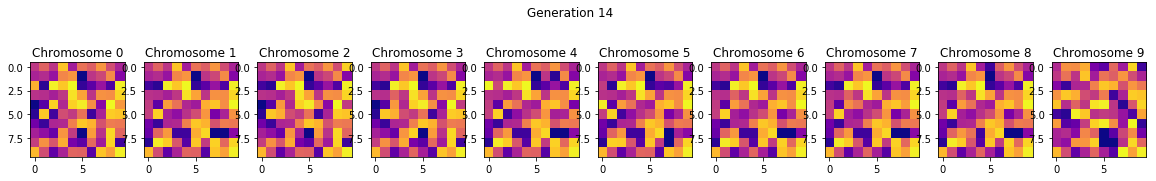

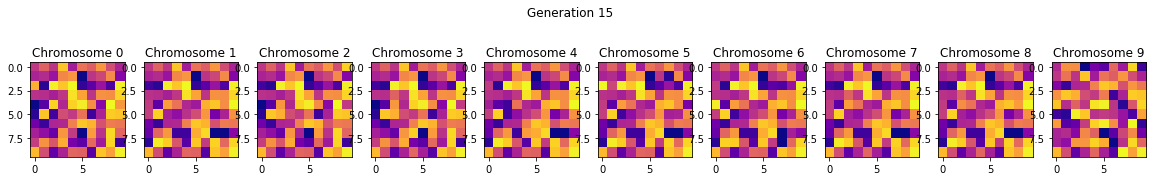

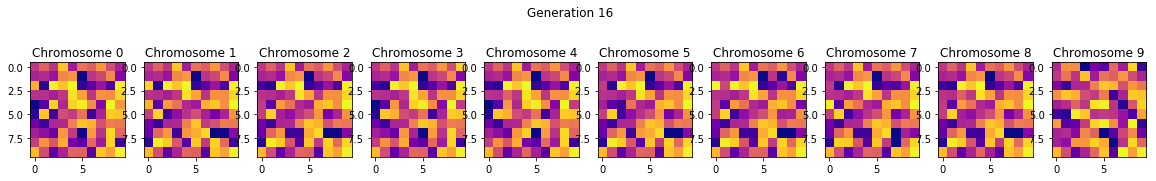

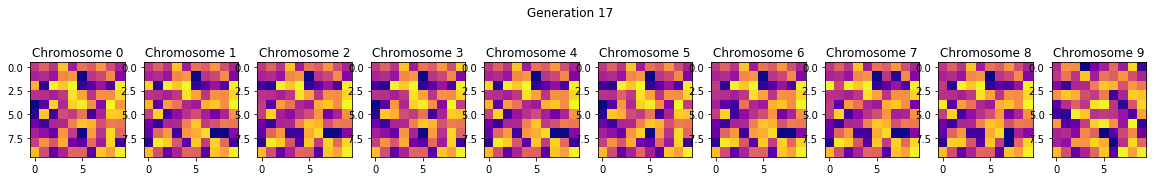

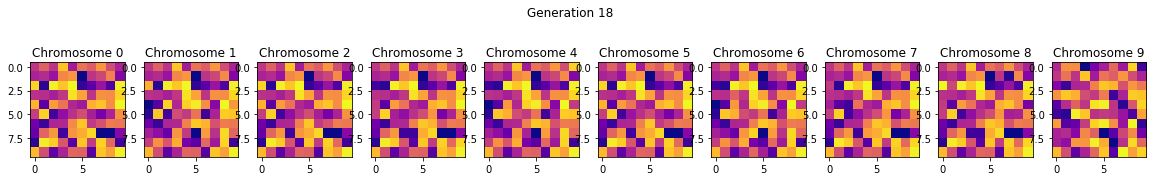

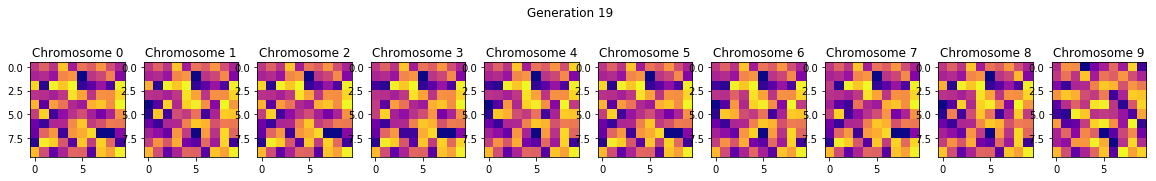

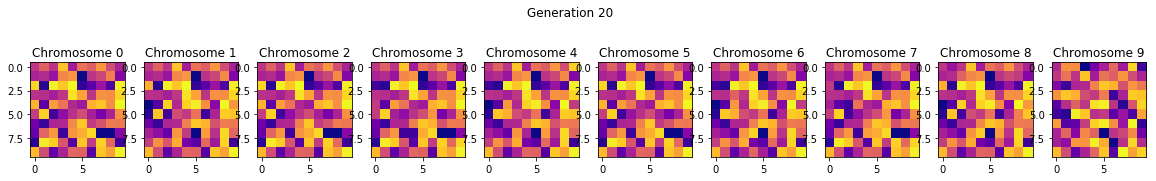

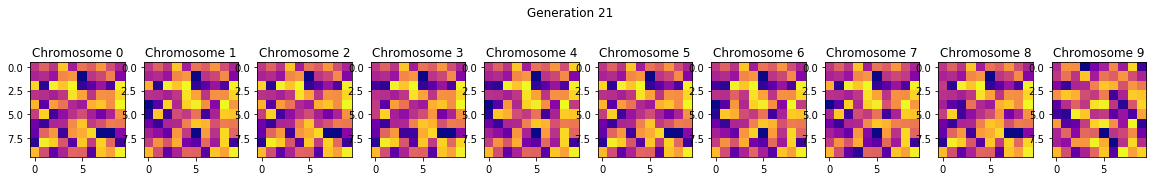

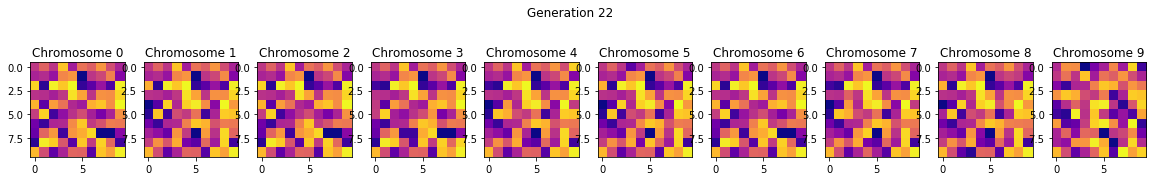

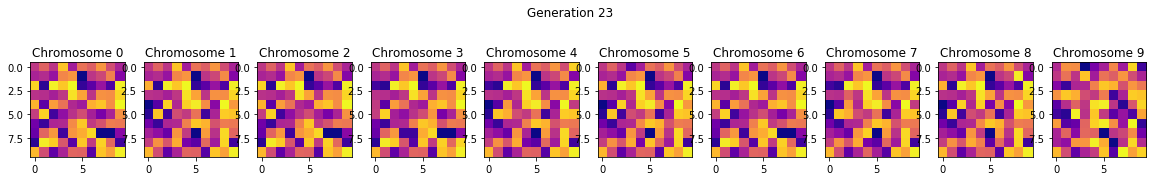

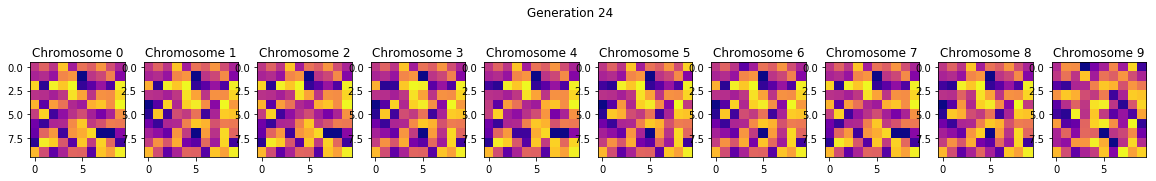

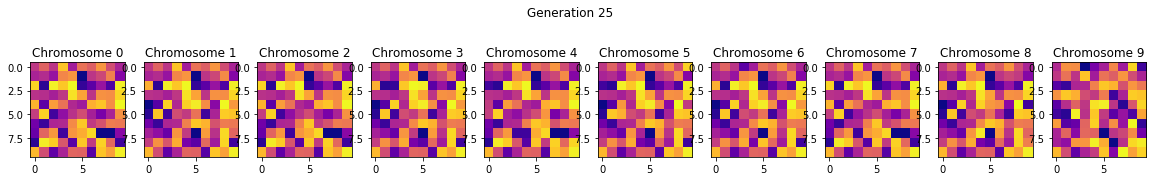

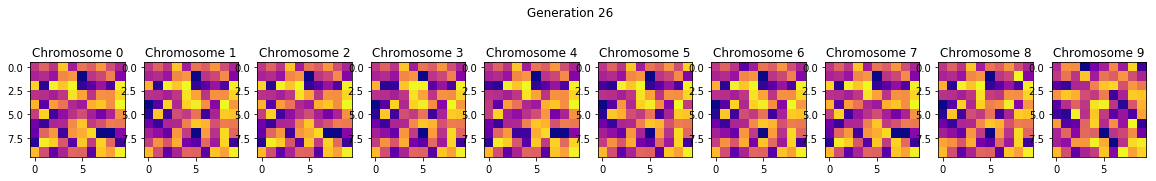

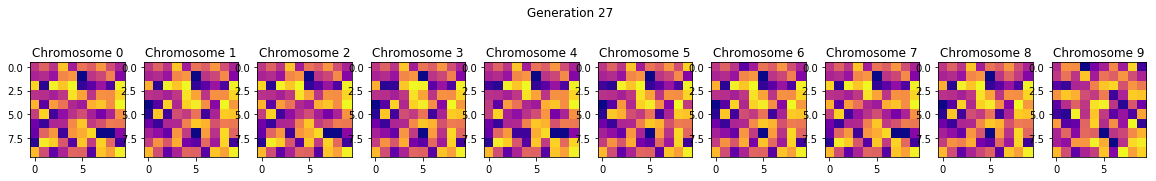

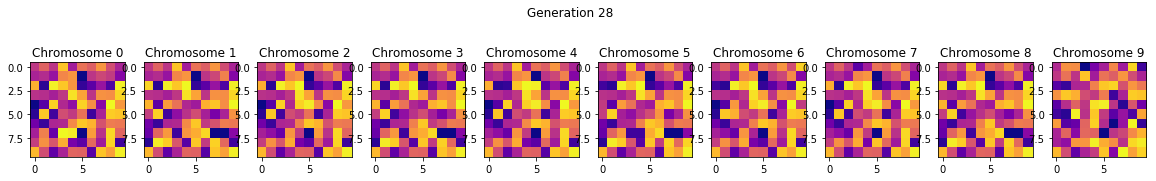

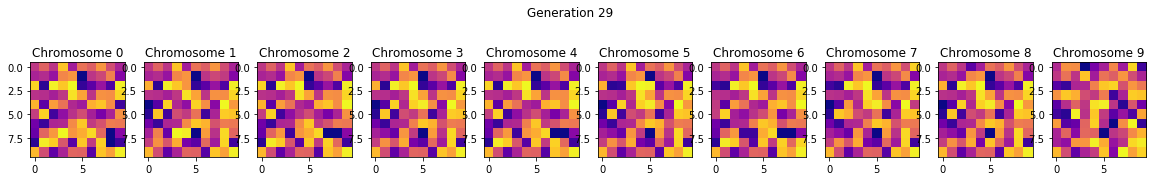

In [21]:
most_fit, fittest_chromosome = run_ga(generations)

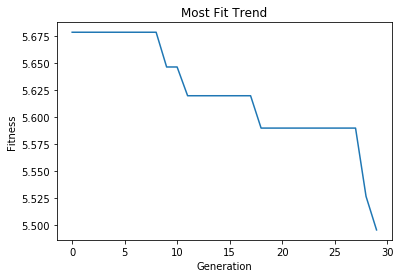

In [22]:
plt.plot(most_fit)
plt.title("Most Fit Trend")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [23]:
fittest_chromosome

array([['Mary', 'Patricia', 'Linda', 'Barbara', 'Elizabeth', 'Jennifer',
        'Maria', 'Susan', 'Margaret', 'Dorothy'],
       ['Lisa', 'Nancy', 'Karen', 'Betty', 'Helen', 'Sandra', 'Donna',
        'Carol', 'Doris', 'Sharon'],
       ['Julia', 'Laura', 'Sarah', 'Kimberly', 'Emily', 'Jessica',
        'Shirley', 'Cynthia', 'Angela', 'Melissa'],
       ['Stephanie', 'Carolyn', 'Kathleen', 'Marie', 'Janet',
        'Catherine', 'Frances', 'Ann', 'Joyce', 'Diane'],
       ['Evelyn', 'Jacqueline', 'Kelly', 'Irene', 'Norma', 'Bonnie',
        'Beverly', 'Marilyn', 'Annie', 'Ruby'],
       ['Andrea', 'Rose', 'Michelle', 'Joan', 'Nicole', 'Denise',
        'Katherine', 'Anne', 'Lori', 'Kathryn'],
       ['Alice', 'Julie', 'Heather', 'Teresa', 'Ruth', 'Gloria', 'Robin',
        'Jean', 'Cheryl', 'Mildred'],
       ['Ashley', 'Christina', 'Phyllis', 'Deborah', 'Judith', 'Sara',
        'Judy', 'Wanda', 'Janice', 'Lillian'],
       ['Kathy', 'Diana', 'Rachel', 'Louise', 'Tina', 'Theresa', 'Ta